In [18]:
import pickle 
import os
from datetime import datetime,timezone,timedelta
import pickle

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal

import lib_data_filter as dafi
import lib_data_process as dapr
import lib_plot
import lib_import_other_datasource as imoda

In [19]:
offset = 0

In [20]:
with open('../data/generated_data/270to330/timeseries_ele5_30_azi270_330_time30_all.pkl', 'rb') as f:
    ts_30_30_dict = pickle.load(f)

retrack_method = 'OCES'

dict_gnss_r = {'date':[],'RMSE_2_with_gauge':[],'RMSE_3_with_gauge':[],'std2':[],'std3':[],'meanc2':[],'meanc3':[]}

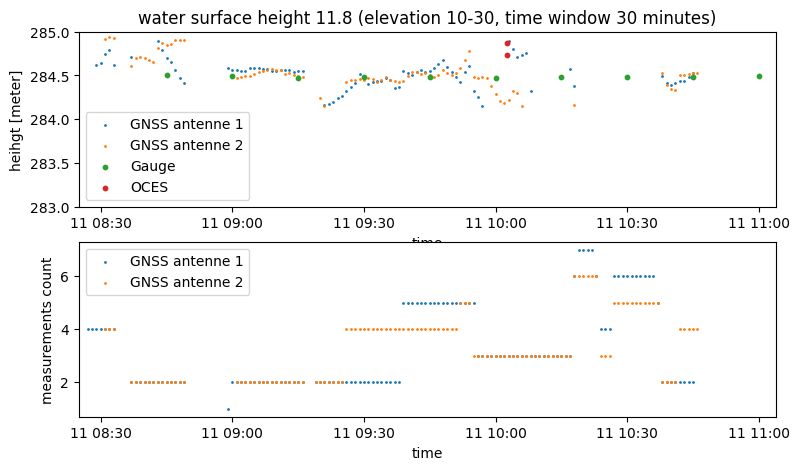

In [21]:
# from gnss-r
date_key = '0811'
ts_2 = ts_30_30_dict['ts'][f'{date_key}_2']
ts_3 = ts_30_30_dict['ts'][f'{date_key}_3']
tsc_2 = ts_30_30_dict['count'][f'{date_key}_2']
tsc_3 = ts_30_30_dict['count'][f'{date_key}_3']
ante_h = imoda.get_antenne_height(date_key)
# from sentinel
ts_sentinel = imoda.get_sentinel_data(date_key,retrack_method)
# from gauge
ts_gauge = imoda.get_gauge_data(date_key)
lib_plot.plot_timeseries(ts_2, ts_3, ante_h['2'], ante_h['3'],\
                         tsc_1=tsc_2,tsc_2=tsc_3, ts_gauge=ts_gauge, \
                         ts_sentinel=ts_sentinel, retrack_method=retrack_method)

In [22]:
pseud_truth = np.mean(list(ts_gauge.values()))

np1 = np.sqrt(np.nanmean((ante_h['2']+offset-np.asarray(list(ts_2.values())) - pseud_truth)**2))
np2 = np.sqrt(np.nanmean((ante_h['3']+offset-np.asarray(list(ts_3.values())) - pseud_truth)**2))
dict_gnss_r['date'].append(date_key)
dict_gnss_r['RMSE_2_with_gauge'].append(np1)
dict_gnss_r['RMSE_3_with_gauge'].append(np2)

pseud_truth_2 = np.nanmean(ante_h['2']-np.asarray(list(ts_2.values())))
pseud_truth_3 = np.nanmean(ante_h['3']-np.asarray(list(ts_3.values())))

np1 = np.sqrt(np.nanmean((ante_h['2']-np.asarray(list(ts_2.values())) - pseud_truth_2)**2))
np2 = np.sqrt(np.nanmean((ante_h['3']-np.asarray(list(ts_3.values())) - pseud_truth_3)**2))
dict_gnss_r['std2'].append(np1)
dict_gnss_r['std3'].append(np2)

meanc2 = np.asarray(list(tsc_2.values()))
meanc3 = np.asarray(list(tsc_3.values()))

dict_gnss_r['meanc2'].append(meanc2.sum()/len(meanc2))
dict_gnss_r['meanc3'].append(meanc3.sum()/len(meanc3))

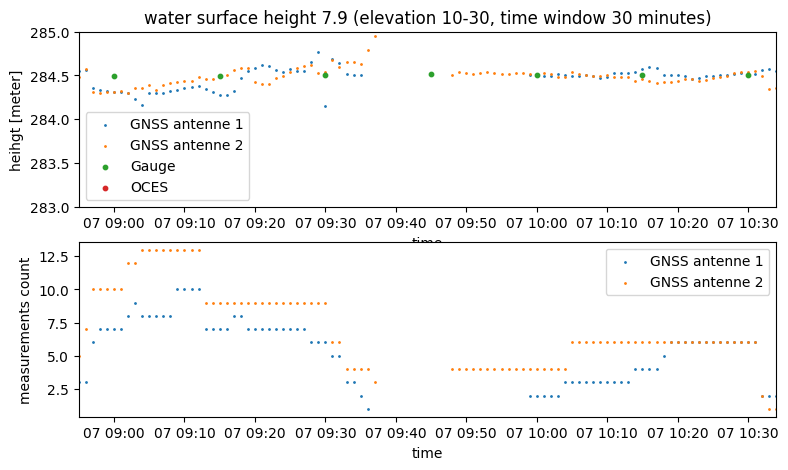

In [23]:
# from gnss-r
date_key = '0907'
ts_2 = ts_30_30_dict['ts'][f'{date_key}_2']
ts_3 = ts_30_30_dict['ts'][f'{date_key}_3']
tsc_2 = ts_30_30_dict['count'][f'{date_key}_2']
tsc_3 = ts_30_30_dict['count'][f'{date_key}_3']
ante_h = imoda.get_antenne_height(date_key)
# from sentinel
ts_sentinel = imoda.get_sentinel_data(date_key,retrack_method)
# from gauge
ts_gauge = imoda.get_gauge_data(date_key)
lib_plot.plot_timeseries(ts_2, ts_3, ante_h['2'], ante_h['3'],\
                         tsc_1=tsc_2,tsc_2=tsc_3, ts_gauge=ts_gauge, \
                         ts_sentinel=ts_sentinel, retrack_method=retrack_method)

In [24]:
pseud_truth = np.mean(list(ts_gauge.values()))

np1 = np.sqrt(np.nanmean((ante_h['2']+offset-np.asarray(list(ts_2.values())) - pseud_truth)**2))
np2 = np.sqrt(np.nanmean((ante_h['3']+offset-np.asarray(list(ts_3.values())) - pseud_truth)**2))
dict_gnss_r['date'].append(date_key)
dict_gnss_r['RMSE_2_with_gauge'].append(np1)
dict_gnss_r['RMSE_3_with_gauge'].append(np2)

pseud_truth_2 = np.nanmean(ante_h['2']-np.asarray(list(ts_2.values())))
pseud_truth_3 = np.nanmean(ante_h['3']-np.asarray(list(ts_3.values())))

np1 = np.sqrt(np.nanmean((ante_h['2']-np.asarray(list(ts_2.values())) - pseud_truth_2)**2))
np2 = np.sqrt(np.nanmean((ante_h['3']-np.asarray(list(ts_3.values())) - pseud_truth_3)**2))
dict_gnss_r['std2'].append(np1)
dict_gnss_r['std3'].append(np2)

meanc2 = np.asarray(list(tsc_2.values()))
meanc3 = np.asarray(list(tsc_3.values()))

dict_gnss_r['meanc2'].append(meanc2.sum()/len(meanc2))
dict_gnss_r['meanc3'].append(meanc3.sum()/len(meanc3))

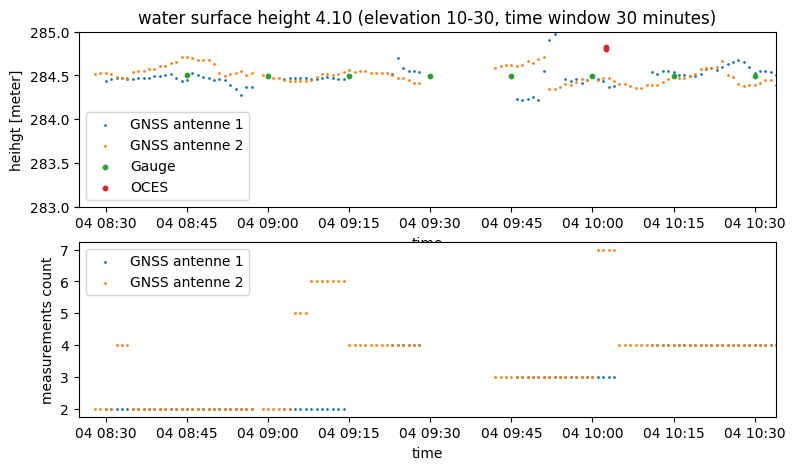

In [25]:
# from gnss-r
date_key = '1004'
ts_2 = ts_30_30_dict['ts'][f'{date_key}_2']
ts_3 = ts_30_30_dict['ts'][f'{date_key}_3']
tsc_2 = ts_30_30_dict['count'][f'{date_key}_2']
tsc_3 = ts_30_30_dict['count'][f'{date_key}_3']
ante_h = imoda.get_antenne_height(date_key)
# from sentinel
ts_sentinel = imoda.get_sentinel_data(date_key,retrack_method)
# from gauge
ts_gauge = imoda.get_gauge_data(date_key)
lib_plot.plot_timeseries(ts_2, ts_3, ante_h['2'], ante_h['3'],\
                         tsc_1=tsc_2,tsc_2=tsc_3, ts_gauge=ts_gauge, \
                         ts_sentinel=ts_sentinel, retrack_method=retrack_method)

In [26]:
pseud_truth = np.mean(list(ts_gauge.values()))

np1 = np.sqrt(np.nanmean((ante_h['2']+offset-np.asarray(list(ts_2.values())) - pseud_truth)**2))
np2 = np.sqrt(np.nanmean((ante_h['3']+offset-np.asarray(list(ts_3.values())) - pseud_truth)**2))
dict_gnss_r['date'].append(date_key)
dict_gnss_r['RMSE_2_with_gauge'].append(np1)
dict_gnss_r['RMSE_3_with_gauge'].append(np2)

pseud_truth_2 = np.nanmean(ante_h['2']-np.asarray(list(ts_2.values())))
pseud_truth_3 = np.nanmean(ante_h['3']-np.asarray(list(ts_3.values())))

np1 = np.sqrt(np.nanmean((ante_h['2']-np.asarray(list(ts_2.values())) - pseud_truth_2)**2))
np2 = np.sqrt(np.nanmean((ante_h['3']-np.asarray(list(ts_3.values())) - pseud_truth_3)**2))
dict_gnss_r['std2'].append(np1)
dict_gnss_r['std3'].append(np2)

meanc2 = np.asarray(list(tsc_2.values()))
meanc3 = np.asarray(list(tsc_3.values()))

dict_gnss_r['meanc2'].append(meanc2.sum()/len(meanc2))
dict_gnss_r['meanc3'].append(meanc3.sum()/len(meanc3))

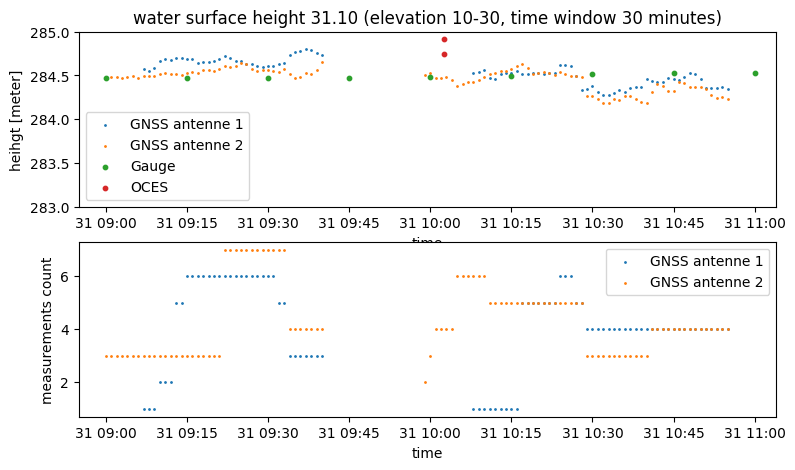

In [27]:
# from gnss-r
date_key = '1031'
ts_2 = ts_30_30_dict['ts'][f'{date_key}_2']
ts_3 = ts_30_30_dict['ts'][f'{date_key}_3']
tsc_2 = ts_30_30_dict['count'][f'{date_key}_2']
tsc_3 = ts_30_30_dict['count'][f'{date_key}_3']
ante_h = imoda.get_antenne_height(date_key)
# from sentinel
ts_sentinel = imoda.get_sentinel_data(date_key,retrack_method)
# from gauge
ts_gauge = imoda.get_gauge_data(date_key)
lib_plot.plot_timeseries(ts_2, ts_3, ante_h['2'], ante_h['3'],\
                         tsc_1=tsc_2,tsc_2=tsc_3, ts_gauge=ts_gauge, \
                         ts_sentinel=ts_sentinel, retrack_method=retrack_method)

In [28]:
pseud_truth = np.mean(list(ts_gauge.values()))

np1 = np.sqrt(np.nanmean((ante_h['2']+offset-np.asarray(list(ts_2.values())) - pseud_truth)**2))
np2 = np.sqrt(np.nanmean((ante_h['3']+offset-np.asarray(list(ts_3.values())) - pseud_truth)**2))
dict_gnss_r['date'].append(date_key)
dict_gnss_r['RMSE_2_with_gauge'].append(np1)
dict_gnss_r['RMSE_3_with_gauge'].append(np2)

pseud_truth_2 = np.nanmean(ante_h['2']-np.asarray(list(ts_2.values())))
pseud_truth_3 = np.nanmean(ante_h['3']-np.asarray(list(ts_3.values())))

np1 = np.sqrt(np.nanmean((ante_h['2']-np.asarray(list(ts_2.values())) - pseud_truth_2)**2))
np2 = np.sqrt(np.nanmean((ante_h['3']-np.asarray(list(ts_3.values())) - pseud_truth_3)**2))
dict_gnss_r['std2'].append(np1)
dict_gnss_r['std3'].append(np2)

meanc2 = np.asarray(list(tsc_2.values()))
meanc3 = np.asarray(list(tsc_3.values()))

dict_gnss_r['meanc2'].append(meanc2.sum()/len(meanc2))
dict_gnss_r['meanc3'].append(meanc3.sum()/len(meanc3))

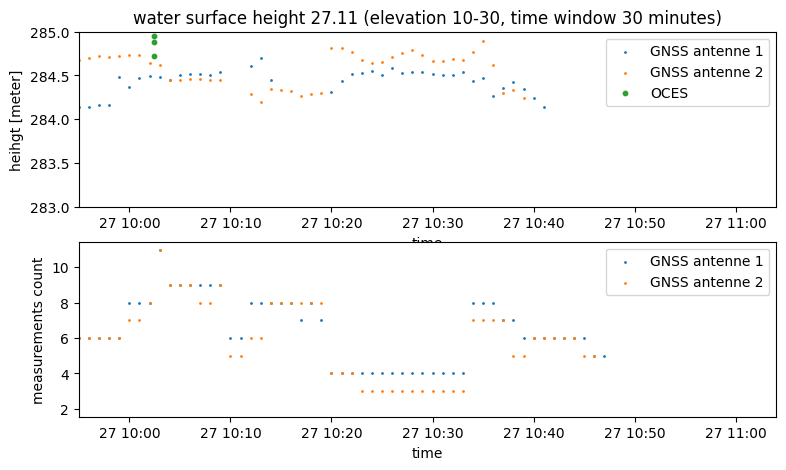

In [29]:
# from gnss-r
date_key = '1127'
ts_2 = ts_30_30_dict['ts'][f'{date_key}_2']
ts_3 = ts_30_30_dict['ts'][f'{date_key}_3']
tsc_2 = ts_30_30_dict['count'][f'{date_key}_2']
tsc_3 = ts_30_30_dict['count'][f'{date_key}_3']
ante_h = imoda.get_antenne_height(date_key)
# from sentinel
ts_sentinel = imoda.get_sentinel_data(date_key,retrack_method)
# from gauge
ts_gauge = imoda.get_gauge_data(date_key)
lib_plot.plot_timeseries(ts_2, ts_3, ante_h['2'], ante_h['3'],\
                         tsc_1=tsc_2,tsc_2=tsc_3, ts_gauge=[], \
                         ts_sentinel=ts_sentinel, retrack_method=retrack_method)

In [30]:
pseud_truth = np.mean(list(ts_gauge.values()))

np1 = np.sqrt(np.nanmean((ante_h['2']+offset-np.asarray(list(ts_2.values())) - pseud_truth)**2))
np2 = np.sqrt(np.nanmean((ante_h['3']+offset-np.asarray(list(ts_3.values())) - pseud_truth)**2))
dict_gnss_r['date'].append(date_key)
dict_gnss_r['RMSE_2_with_gauge'].append(np1)
dict_gnss_r['RMSE_3_with_gauge'].append(np2)

pseud_truth_2 = np.nanmean(ante_h['2']-np.asarray(list(ts_2.values())))
pseud_truth_3 = np.nanmean(ante_h['3']-np.asarray(list(ts_3.values())))

np1 = np.sqrt(np.nanmean((ante_h['2']-np.asarray(list(ts_2.values())) - pseud_truth_2)**2))
np2 = np.sqrt(np.nanmean((ante_h['3']-np.asarray(list(ts_3.values())) - pseud_truth_3)**2))
dict_gnss_r['std2'].append(np1)
dict_gnss_r['std3'].append(np2)

meanc2 = np.asarray(list(tsc_2.values()))
meanc3 = np.asarray(list(tsc_3.values()))

dict_gnss_r['meanc2'].append(meanc2.sum()/len(meanc2))
dict_gnss_r['meanc3'].append(meanc3.sum()/len(meanc3))

c:\Users\yuziq\Anaconda3\envs\gnss_ir\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yuziq\Anaconda3\envs\gnss_ir\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\yuziq\AppData\Local\Temp\ipykernel_388\3307189614.py:3: RuntimeWarning: Mean of empty slice
  np1 = np.sqrt(np.nanmean((ante_h['2']+offset-np.asarray(list(ts_2.values())) - pseud_truth)**2))
C:\Users\yuziq\AppData\Local\Temp\ipykernel_388\3307189614.py:4: RuntimeWarning: Mean of empty slice
  np2 = np.sqrt(np.nanmean((ante_h['3']+offset-np.asarray(list(ts_3.values())) - pseud_truth)**2))


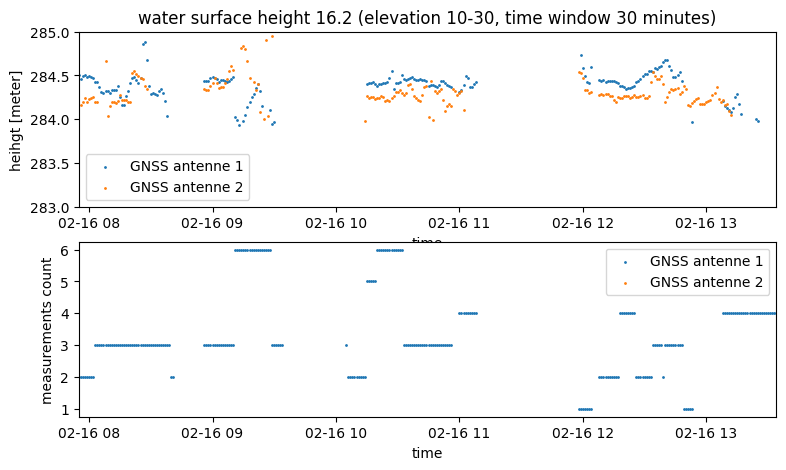

In [31]:
# from gnss-r
date_key = '0216'
ts_1 = ts_30_30_dict['ts'][f'{date_key}_1']
ts_2 = ts_30_30_dict['ts'][f'{date_key}_2']

tsc_1 = ts_30_30_dict['count'][f'{date_key}_1']
tsc_2 = ts_30_30_dict['count'][f'{date_key}_2']
tsc_2 = ts_30_30_dict['count'][f'{date_key}_r']
ante_h = imoda.get_antenne_height(date_key)
# from sentinel
# ts_sentinel = imoda.get_sentinel_data(date_key,retrack_method)
# from gauge
# ts_gauge = imoda.get_gauge_data(date_key)
lib_plot.plot_timeseries(ts_1, ts_2, ante_h['1'], ante_h['2'],\
                         tsc_1=tsc_1,tsc_2=tsc_2, ts_gauge=[], \
                         ts_sentinel=[], retrack_method=retrack_method)

In [32]:

dict_gnss_r['date'].append(date_key)
dict_gnss_r['RMSE_2_with_gauge'].append(None)
dict_gnss_r['RMSE_3_with_gauge'].append(None)

pseud_truth_1 = np.nanmean(ante_h['1']-np.asarray(list(ts_1.values())))
pseud_truth_2 = np.nanmean(ante_h['2']+offset-np.asarray(list(ts_2.values())))

np1 = np.sqrt(np.nanmean((ante_h['1']-np.asarray(list(ts_1.values())) - pseud_truth_1)**2))
np2 = np.sqrt(np.nanmean((ante_h['2']-np.asarray(list(ts_2.values())) - pseud_truth_2)**2))
dict_gnss_r['std2'].append(np1)
dict_gnss_r['std3'].append(np2)

meanc1 = np.asarray(list(tsc_1.values()))
meanc2 = np.asarray(list(tsc_2.values()))

dict_gnss_r['meanc2'].append(meanc1.sum()/len(meanc1))
dict_gnss_r['meanc3'].append(meanc2.sum()/len(meanc2))

0.12417035089611216


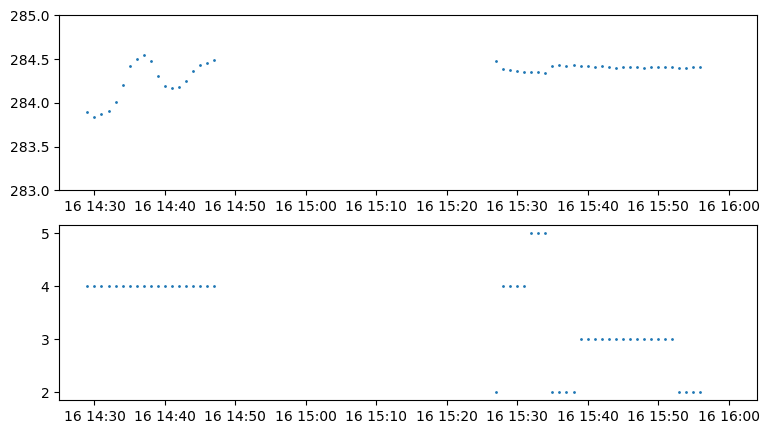

In [40]:
ts_2r = ts_30_30_dict['ts'][f'{date_key}_r']
tsc_2r = ts_30_30_dict['count'][f'{date_key}_r']
t1 = min([list(ts_2r.keys())[0],list(tsc_2.keys())[0]])-timedelta(minutes=20)
t2 = max([list(ts_2r.keys())[-1],list(tsc_2.keys())[-1]])+timedelta(minutes=20)
fig,ax = plt.subplots(2)
ax[0].scatter(list(ts_2r.keys()), ante_h['2r']-np.asarray(list(ts_2r.values())), s=1)
ax[1].scatter(tsc_2r.keys(), tsc_2r.values(), s=1)
ax[0].set_xlim([t1,t2])
ax[0].set_ylim([283,285])
ax[1].set_xlim([t1,t2])
fig.set_size_inches(9,5)


std_2r = np.nanstd(ante_h['2r']-np.asarray(list(ts_2r.values())[25:]))
print(std_2r)

In [39]:
list(ts_2r.values())

[2.824999999999964,
 2.8489999999999616,
 2.798999999999967,
 2.844999999999962,
 2.7609999999999713,
 2.843999999999962,
 2.8509999999999613,
 2.844999999999962,
 2.844999999999962,
 2.845999999999962,
 2.844999999999962,
 2.8499999999999615,
 2.855999999999961,
 2.8389999999999627,
 2.8389999999999627,
 2.7699999999999703,
 2.86399999999996,
 3.3589999999999054,
 2.8769999999999585,
 3.4139999999998993,
 2.8849999999999576,
 3.381999999999903,
 2.898999999999956,
 2.9019999999999557,
 3.3509999999999063,
 2.9049999999999554,
 3.2479999999999176,
 2.908999999999955,
 3.0479999999999396,
 2.833999999999963,
 2.826999999999964,
 2.7479999999999727,
 2.8219999999999645,
 2.709999999999977,
 2.8299999999999637,
 2.779999999999969,
 2.8229999999999644,
 2.942999999999951,
 2.826999999999964,
 3.0569999999999387,
 2.836999999999963,
 3.0869999999999354,
 2.8379999999999628,
 3.0749999999999367,
 2.836999999999963,
 3.006999999999944,
 2.8399999999999626,
 2.889999999999957,
 2.8509999999999

In [34]:
df_gnss_r = pd.DataFrame(dict_gnss_r)
df_gnss_r.round(2)

,date,RMSE_2_with_gauge,RMSE_3_with_gauge,std2,std3,meanc2,meanc3
0,0811,0.23,0.24,0.16,0.18,3.30,3.33
1,0907,0.26,0.25,0.14,0.10,4.49,6.09
2,1004,0.24,0.21,0.13,0.09,2.99,3.54
3,1031,0.20,0.26,0.14,0.12,4.05,4.30
4,1127,NaN,NaN,0.12,0.18,6.24,5.93
5,0216,NaN,NaN,0.16,0.16,3.33,3.41
